In [1]:
import pandas as pd
df=pd.read_csv(r'D:\Old\vscodess\Python\EDA\student_extended_ml_dataset2.csv')
df

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low
...,...,...,...,...,...,...,...,...,...,...
4995,Steven Lynch,30,Female,3.653474,143,93,59,85,True,Low
4996,Donna Hamilton,33,Female,1.096493,132,68,70,99,True,Low
4997,Mrs. Ashley Howard,38,Male,4.156770,111,76,96,71,False,Low
4998,Kendra Murray,18,Female,6.788548,137,81,98,73,False,High


In [2]:
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

In [3]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


In [4]:
df.dtypes

Name                  object
Age                    int64
Gender                object
Hours_Studied        float64
IQ                     int64
Physics_Marks          int64
Math_Marks             int64
Chemistry_Marks        int64
Has_Part_Time_Job       bool
Study_Hours_Group     object
dtype: object

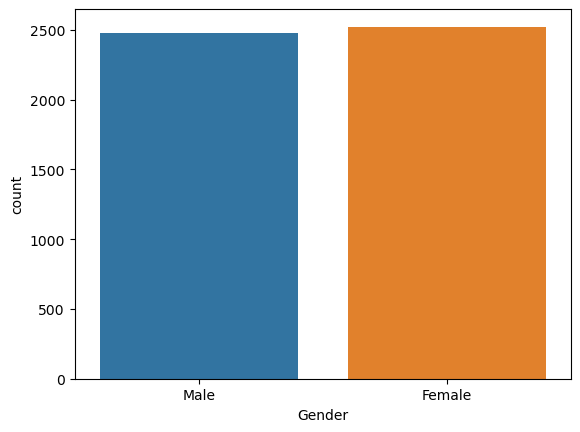

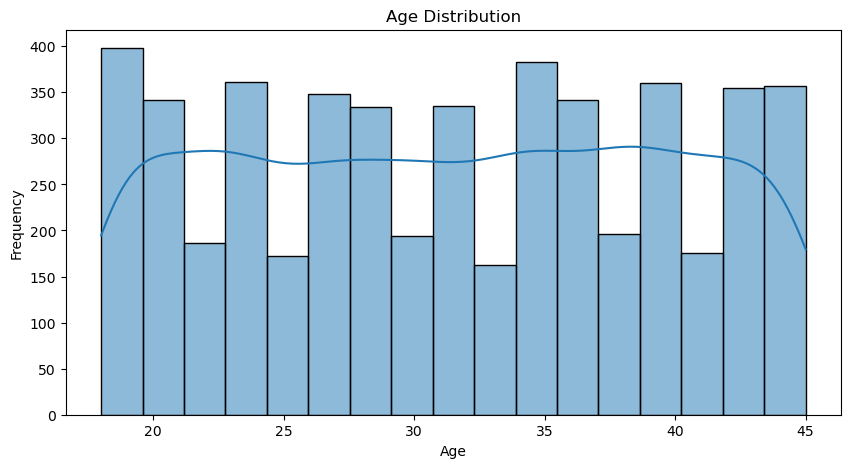

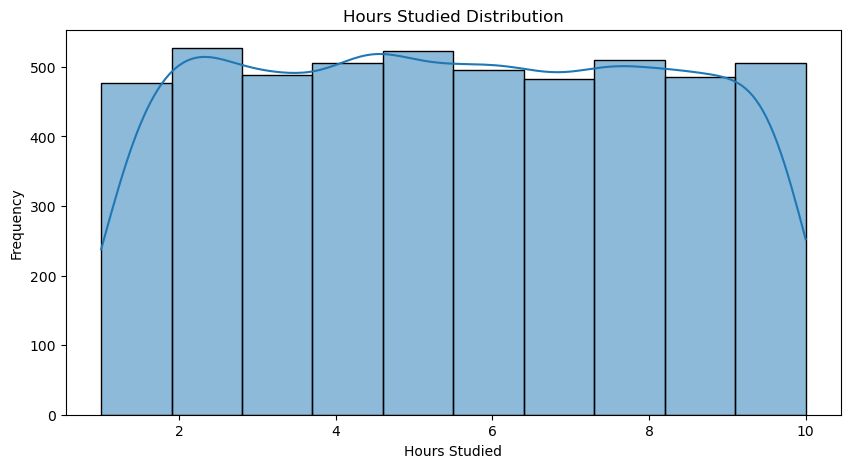

In [5]:
#univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender',data=df)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Hours_Studied'], bins=10, kde=True)
plt.title('Hours Studied Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

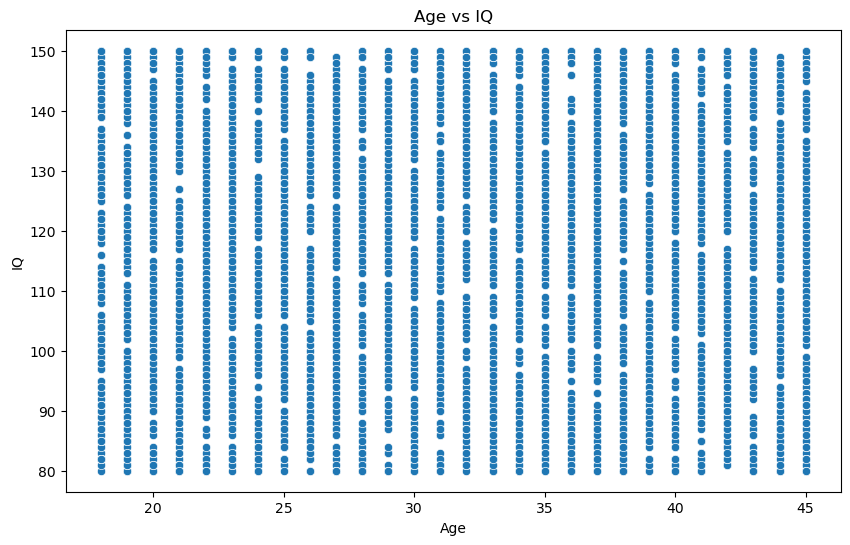

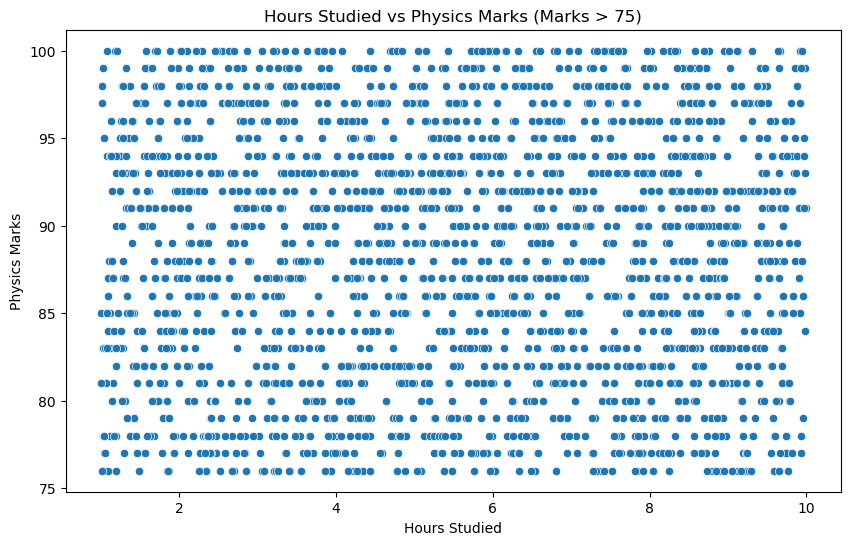

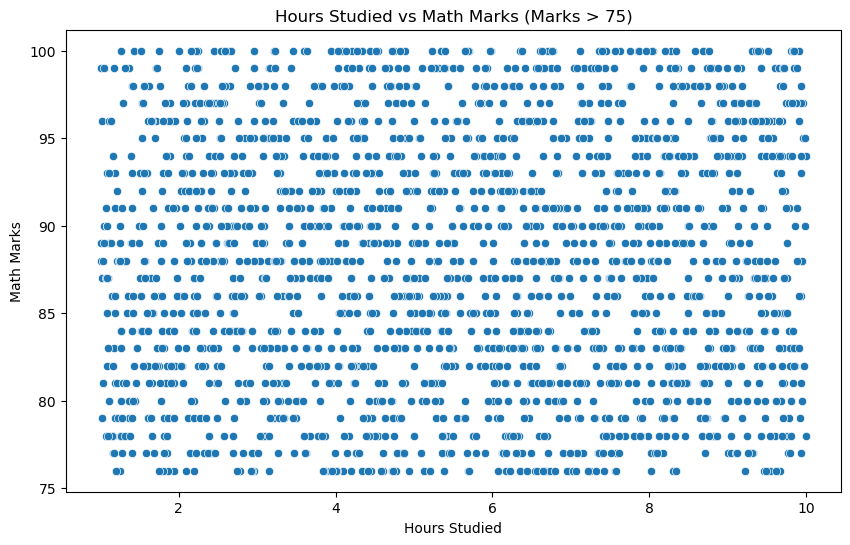

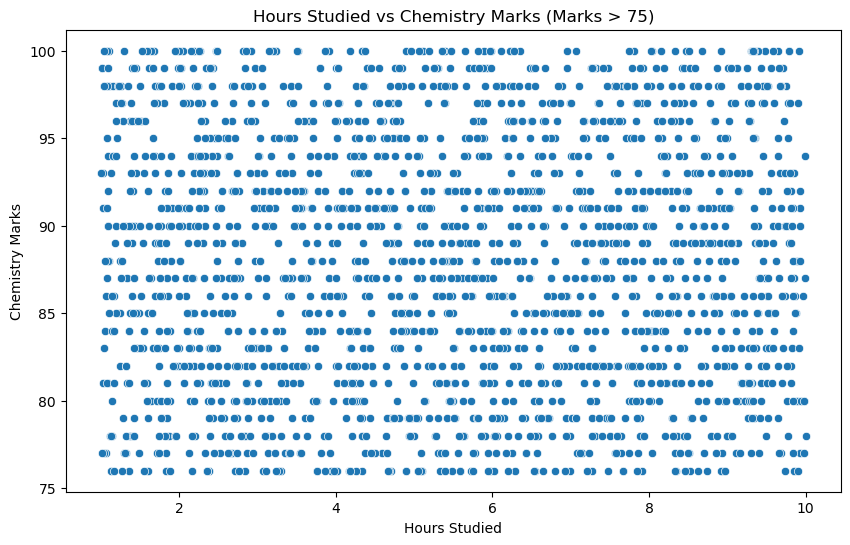

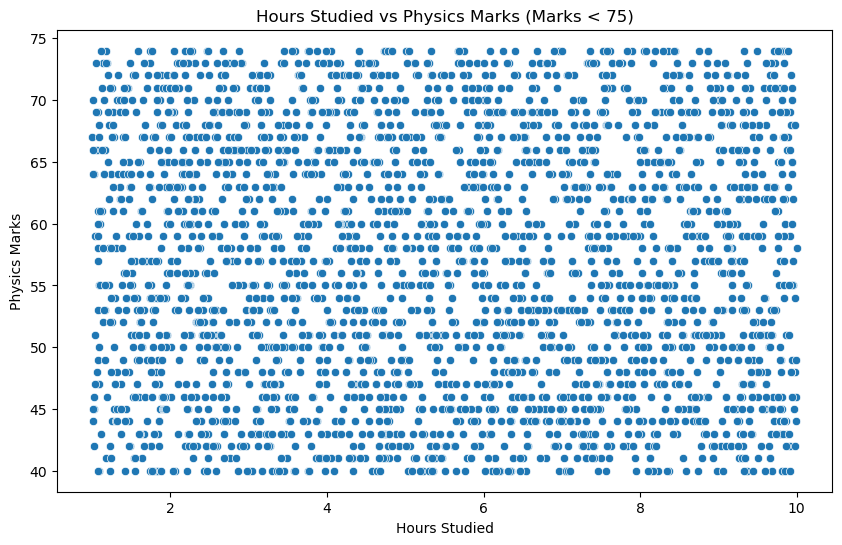

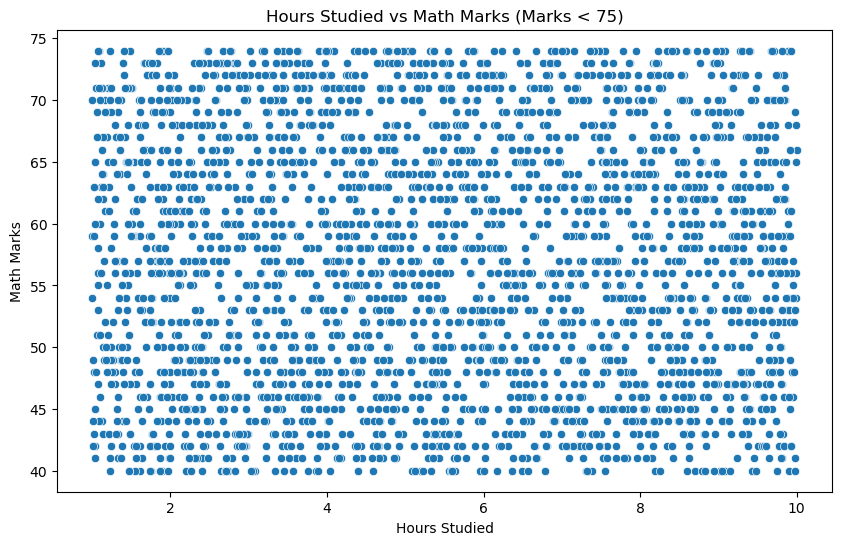

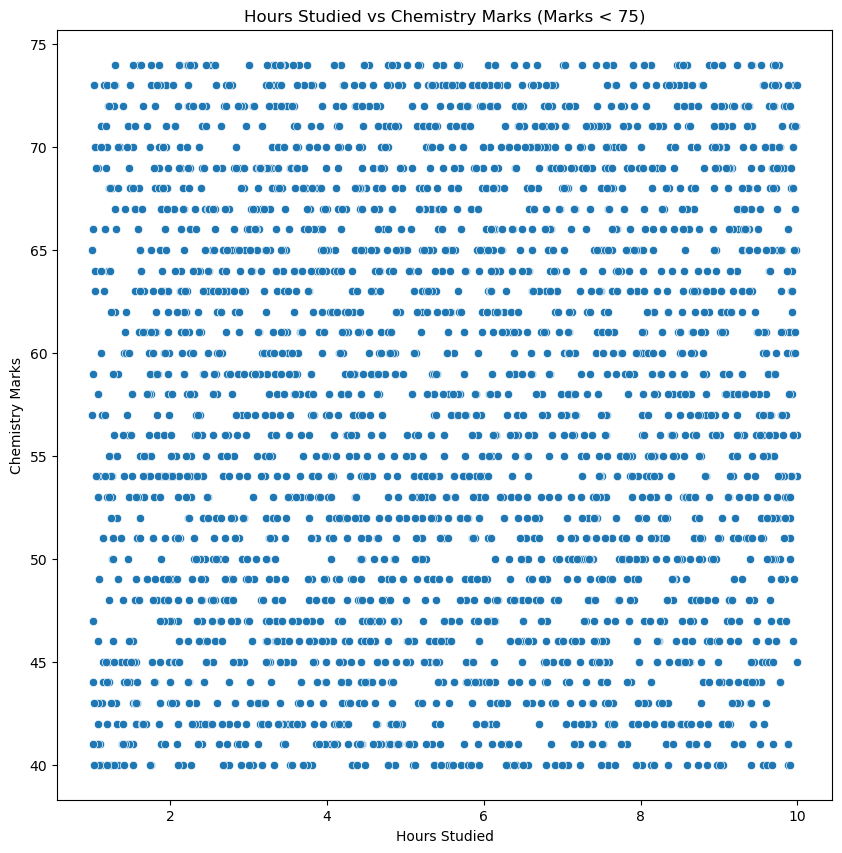

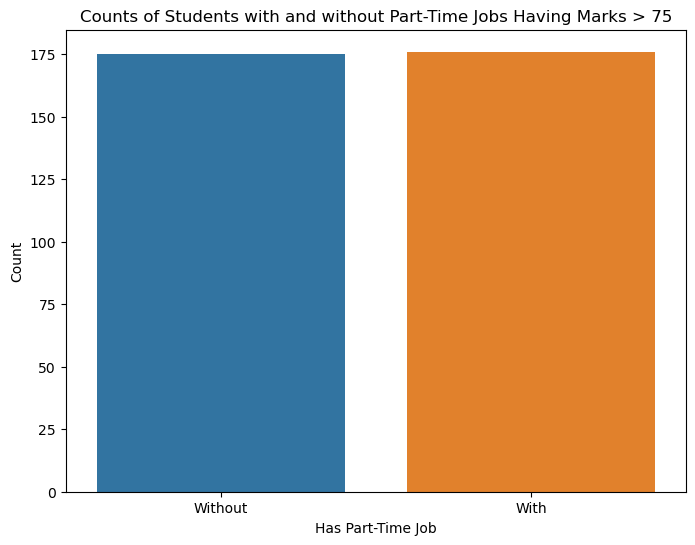

In [6]:
#bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='IQ', data=df)
plt.title('Age vs IQ')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.show()

physics_data = df[df['Physics_Marks'] > 75]
math_data = df[df['Math_Marks'] > 75]
chemistry_data = df[df['Chemistry_Marks'] > 75]
physics_data2 = df[df['Physics_Marks'] < 75]
math_data2 = df[df['Math_Marks'] < 75]
chemistry_data2 = df[df['Chemistry_Marks'] < 75]
job_data = df

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Physics_Marks', data=physics_data)
plt.title('Hours Studied vs Physics Marks (Marks > 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Physics Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Math_Marks', data=math_data)
plt.title('Hours Studied vs Math Marks (Marks > 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Math Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Chemistry_Marks', data=chemistry_data)
plt.title('Hours Studied vs Chemistry Marks (Marks > 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Chemistry Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Physics_Marks', data=physics_data2)
plt.title('Hours Studied vs Physics Marks (Marks < 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Physics Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Math_Marks', data=math_data2)
plt.title('Hours Studied vs Math Marks (Marks < 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Math Marks')
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Hours_Studied', y='Chemistry_Marks', data=chemistry_data2)
plt.title('Hours Studied vs Chemistry Marks (Marks < 75)')
plt.xlabel('Hours Studied')
plt.ylabel('Chemistry Marks')
plt.show()

job_data=df[(df['Physics_Marks']>75) & (df['Math_Marks']>75) & (df['Chemistry_Marks']>75) 
            & (df['Has_Part_Time_Job']==True)].copy()
nojob_data=df[(df['Physics_Marks']>75) & (df['Math_Marks']>75) & (df['Chemistry_Marks']>75) 
            & (df['Has_Part_Time_Job']==False)].copy()

job_data['Job_Type'] = 'Has Part-Time Job'
nojob_data['Job_Type'] = 'No Part-Time Job'

all_job = pd.concat([job_data, nojob_data])

plt.figure(figsize=(8, 6))
a=sns.countplot(x='Has_Part_Time_Job', data=all_job)
a.set_xticklabels(['Without','With'])
plt.xlabel('Has Part-Time Job')
plt.ylabel('Count')
plt.title('Counts of Students with and without Part-Time Jobs Having Marks > 75')
plt.show()

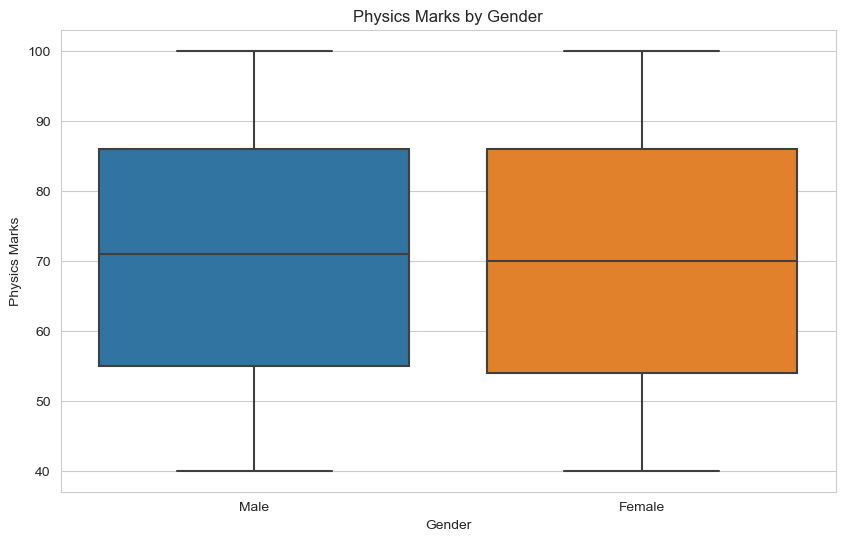

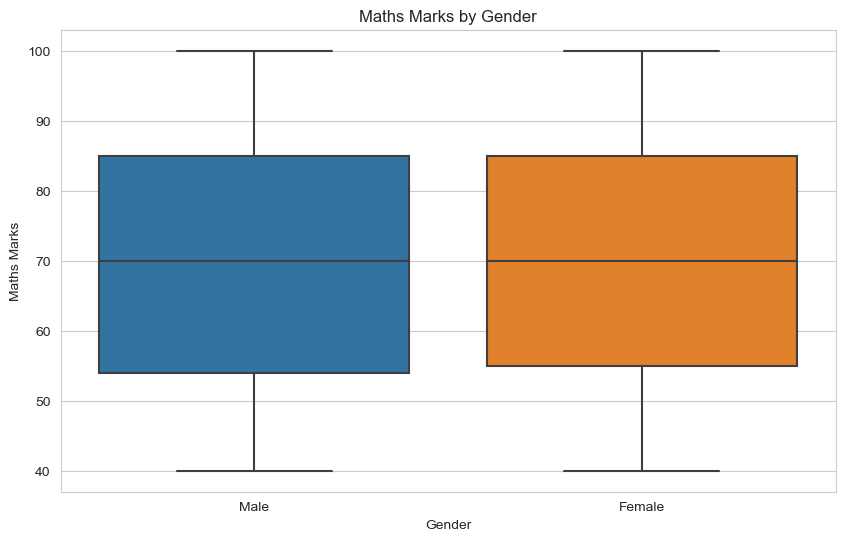

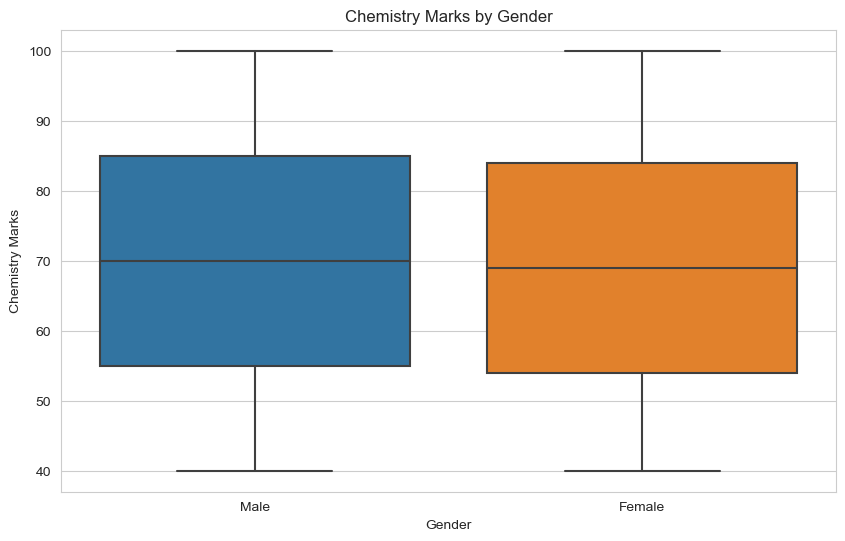

In [7]:
#multivariate analysis
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Physics_Marks', data=df)
plt.title('Physics Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Physics Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Math_Marks', data=df)
plt.title('Maths Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Maths Marks')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Chemistry_Marks', data=df)
plt.title('Chemistry Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Chemistry Marks')
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = df[['Hours_Studied', 'IQ', 'Has_Part_Time_Job']]
y = df['Physics_Marks']
y2 = df['Math_Marks']
y3 = df['Chemistry_Marks']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=0)
x3_train, x3_test, y3_train, y3_test = train_test_split(x, y3, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
model2 = LinearRegression()
model2.fit(x2_train,y2_train)
model3 = LinearRegression()
model3.fit(x3_train, y3_train)

y_pred = model.predict(x_test)
y2_pred = model2.predict(x2_test)
y3_pred = model3.predict(x3_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Physcis Root Mean Squared Error: {rmse}')
print("Sample Physics predicted marks:", int(y_pred[0]))
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
print(f'Maths Root Mean Squared Error: {rmse2}')
print("Sample Maths predicted marks:", int(y2_pred[0]))
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = np.sqrt(mse3)
print(f'Chemistry Root Mean Squared Error: {rmse3}')
print("Sample Chemistry predicted marks:", int(y3_pred[0]))

Physcis Root Mean Squared Error: 17.76021199738412
Sample Physics predicted marks: 70
Maths Root Mean Squared Error: 17.602844724855274
Sample Maths predicted marks: 69
Chemistry Root Mean Squared Error: 17.242832486009245
Sample Chemistry predicted marks: 69
